# Limpiador de Datos - Dataset de Criptomonedas

**Autor:** Diego Coello Morán

**Propósito:** Este notebook limpia un dataset sucio de criptomonedas recibido de un compañero para el Desafío de Data Wrangling.

## Tareas de Limpieza:

1. Cargar e inspeccionar el dataset sucio
2. Identificar todos los problemas de calidad de datos
3. Limpiar cada tipo de error sistemáticamente
4. Validar los datos limpios
5. Realizar análisis básico
6. Generar visualizaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Configurar opciones de visualización.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Configurar estilo para gráficos.
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

print("Librerías importadas exitosamente!")

Librerías importadas exitosamente!


## 1. Carga e Inspección Inicial

In [2]:
# Cargar el dataset sucio.
df_dirty = pd.read_csv("recieved_dirty_dataset.csv")

print(f"Dimensiones del dataset: {df_dirty.shape}")
print(f"\nNombres de columnas: {df_dirty.columns.tolist()}")
print(f"\nTipos de datos:\n{df_dirty.dtypes}")
print(f"\nPrimeras 10 filas:")
df_dirty.head(10)

Dimensiones del dataset: (3052, 10)

Nombres de columnas: ['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Market Cap', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)', 'Total Volume All Currencies (24Hr)', 'Circulating Supply']

Tipos de datos:
Symbol                                  object
Name                                    object
Price (Intraday)                        object
Change                                 float64
% Change                                object
Market Cap                              object
Volume in Currency (Since 0:00 UTC)     object
Volume in Currency (24Hr)               object
Total Volume All Currencies (24Hr)      object
Circulating Supply                      object
dtype: object

Primeras 10 filas:


,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"27,921.96",-101.170000,-0.36%,540.056B,10.068B,10.068B,10.068B,19.342M
1,ETH-USD,Ethereum USD,"1,838.81",-29.010000,-1.55%,221.499B,5.859B,5.859B,5.859B,120.458M
2,USDT-USD,Tether USD,1.0004,0.000000,0.00%,80.240B,18.796B,18.796B,18.796B,80.211B
3,BNB-USD,BNB USD,310.8,-1.550000,-0.50%,49.072B,460.394M,460.394M,460.394M,157.887M
4,USDC-USD,USD Coin USD,0.9997,-0.000100,-0.01%,32.592B,2.389B,2.389B,2.389B,32.6B
5,XRP-USD,XRP USD,0.502372,-0.007247,-1.42%,25.967B,565.59M,565.59M,565.59M,51.688B
6,ADA-USD,Cardano USD,0.3888,0.001100,0.002807,13.517B,197.578M,197.578M,197.578M,34.762B
7,HEX-USD,HEX USD,0.0711,0.001100,0.015203,12.336B,6.016M,6.016M,6.016M,173.411B
8,DOGE-USD,Dogecoin USD,0.0834,0.000200,0.25%,11.582B,489.325M,489.325M,489.325M,138.868B
9,STETH-USD,Lido Staked ETH USD,"1,820.71",-35.330000,-1.90%,10.798B,44.878M,44.878M,44.878M,5.931M


In [3]:
# Estadísticas básicas.
print("ESTADÍSTICAS BÁSICAS:")
print("="*60)
print(f"\nInformación del dataset:")
df_dirty.info()

print(f"\n\nEstadísticas descriptivas:")
df_dirty.describe()

ESTADÍSTICAS BÁSICAS:

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Symbol                               3052 non-null   object 
 1   Name                                 3052 non-null   object 
 2   Price (Intraday)                     3052 non-null   object 
 3   Change                               3052 non-null   float64
 4   % Change                             3052 non-null   object 
 5   Market Cap                           3052 non-null   object 
 6   Volume in Currency (Since 0:00 UTC)  3052 non-null   object 
 7   Volume in Currency (24Hr)            3052 non-null   object 
 8   Total Volume All Currencies (24Hr)   3052 non-null   object 
 9   Circulating Supply                   3052 non-null   object 
dtypes: float64(1), object(9)
memory usage: 238.6+ KB

,Change
count,3052.000000
mean,-0.317489
std,23.750672
min,-965.680000
25%,-0.000680
50%,-0.000009
75%,0.000003
max,814.720000


## 2. Identificar Problemas de Calidad de Datos

In [4]:
print("EVALUACIÓN DE CALIDAD DE DATOS:")
print("="*60)

# Verificar valores faltantes.
print("\n1. VALORES FALTANTES:")
missing = df_dirty.isnull().sum()
missing_pct = (missing / len(df_dirty)) * 100
missing_df = pd.DataFrame({"Cantidad Faltante": missing,"Porcentaje": missing_pct})
print(missing_df[missing_df["Cantidad Faltante"] > 0].sort_values("Cantidad Faltante", ascending=False))

# Verificar duplicados.
print("\n2. DUPLICADOS:")
duplicates = df_dirty.duplicated().sum()
print(f"Total de filas duplicadas: {duplicates}")
if duplicates > 0:
    print(f"\nEjemplos de duplicados:")
    print(df_dirty[df_dirty.duplicated(keep=False)].head(10))

# Verificar tipos de datos.
print("\n3. TIPOS DE DATOS:")
print(df_dirty.dtypes)

# Verificar valores únicos en columnas categóricas.
print("\n4. COLUMNAS CATEGÓRICAS:")
categorical_cols = df_dirty.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    unique_count = df_dirty[col].nunique()
    print(f"  {col}: {unique_count} valores únicos")
    if unique_count < 20:
        print(f"Valores: {df_dirty[col].unique()[:10]}")

EVALUACIÓN DE CALIDAD DE DATOS:

1. VALORES FALTANTES:
Empty DataFrame
Columns: [Cantidad Faltante, Porcentaje]
Index: []

2. DUPLICADOS:
Total de filas duplicadas: 0

3. TIPOS DE DATOS:
Symbol                                  object
Name                                    object
Price (Intraday)                        object
Change                                 float64
% Change                                object
Market Cap                              object
Volume in Currency (Since 0:00 UTC)     object
Volume in Currency (24Hr)               object
Total Volume All Currencies (24Hr)      object
Circulating Supply                      object
dtype: object

4. COLUMNAS CATEGÓRICAS:
  Symbol: 3018 valores únicos
  Name: 3002 valores únicos
  Price (Intraday): 2594 valores únicos
  % Change: 1409 valores únicos
  Market Cap: 2551 valores únicos
  Volume in Currency (Since 0:00 UTC): 2369 valores únicos
  Volume in Currency (24Hr): 2369 valores únicos
  Total Volume All Currencies (

## 3. Pasos de Limpieza de Datos

In [5]:
# Crear una copia para limpieza.
df_clean = df_dirty.copy()
print(f"Iniciando proceso de limpieza...")
print(f"Dimensiones iniciales: {df_clean.shape}")

Iniciando proceso de limpieza...
Dimensiones iniciales: (3052, 10)


### 3.1 Eliminar Duplicados

In [6]:
# Eliminar duplicados exactos.
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
removed_duplicates = initial_rows - len(df_clean)

print(f"Eliminadas {removed_duplicates} filas duplicadas")
print(f"Nuevas dimensiones: {df_clean.shape}")

Eliminadas 0 filas duplicadas
Nuevas dimensiones: (3052, 10)


### 3.2 Limpiar Nombres de Columnas

In [7]:
# Limpiar espacios en nombres de columnas.
df_clean.columns = df_clean.columns.str.strip()

print(f"Nombres de columnas limpiados")
print(f"Columnas: {df_clean.columns.tolist()}")

Nombres de columnas limpiados
Columnas: ['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Market Cap', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)', 'Total Volume All Currencies (24Hr)', 'Circulating Supply']


### 3.3 Limpiar Datos de Texto

In [8]:
# Limpiar columnas de texto (eliminar espacios extra).
print("Limpiando datos de texto...\n")

text_columns = ["Symbol", "Name"]
for col in text_columns:
    if col in df_clean.columns:
        # Eliminar espacios al inicio/final.
        df_clean[col] = df_clean[col].astype(str).str.strip()
        print(f"Limpiada columna '{col}'")

print(f"\nValores únicos en Symbol: {df_clean["Symbol"].nunique() if "Symbol" in df_clean.columns else "N/A"}")

Limpiando datos de texto...

Limpiada columna 'Symbol'
Limpiada columna 'Name'

Valores únicos en Symbol: 3018


### 3.4 Limpiar Columnas Numéricas

In [9]:
# Limpiar columnas numéricas (eliminar símbolos de moneda, comas, etc...).
print("Limpiando columnas numéricas...\n")

def clean_numeric(value):
    """Limpiar valores numéricos eliminando símbolos y convirtiendo a float"""
    if pd.isna(value):
        return np.nan
    
    # Convertir a string.
    value_str = str(value)
    
    # Eliminar símbolos de moneda y otros caracteres no numéricos.
    value_str = value_str.replace("$", "").replace("€", "").replace("£", "")
    value_str = value_str.replace(",", "").replace(" " , " ")
    
    # Intentar convertir a float.
    try:
        return float(value_str)
    except:
        return np.nan

# Aplicar limpieza a columnas numéricas.
numeric_cols = ["Price (Intraday)", "Change"]
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(clean_numeric)
        print(f"Limpiada columna '{col}'")

print(f"\nColumnas numéricas limpiadas")

Limpiando columnas numéricas...

Limpiada columna 'Price (Intraday)'


Limpiada columna 'Change'

Columnas numéricas limpiadas


### 3.5 Limpiar Columnas de Capitalización de Mercado y Volumen

In [10]:
# Limpiar columnas con sufijos B (billones) y M (millones).
print("Limpiando columnas de capitalización y volumen...\n")

def clean_market_value(value):
    """Convertir valores con B/M a números"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip().replace(",", ".")
    
    try:
        if "B" in value_str:
            return float(value_str.replace("B", "")) * 1e9
        elif 'M' in value_str:
            return float(value_str.replace("M", "")) * 1e6
        else:
            return float(value_str)
    except:
        return np.nan

market_cols = ["Market Cap", "Volume in Currency (Since 0:00 UTC)", 
               "Volume in Currency (24Hr)", "Total Volume All Currencies (24Hr)",
               "Circulating Supply"]

for col in market_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(clean_market_value)
        print(f"Limpiada columna '{col}'")

print(f"\nColumnas de mercado limpiadas")

Limpiando columnas de capitalización y volumen...

Limpiada columna 'Market Cap'
Limpiada columna 'Volume in Currency (Since 0:00 UTC)'
Limpiada columna 'Volume in Currency (24Hr)'
Limpiada columna 'Total Volume All Currencies (24Hr)'
Limpiada columna 'Circulating Supply'

Columnas de mercado limpiadas


### 3.6 Limpiar Columna de Porcentaje de Cambio

In [11]:
# Limpiar columna de porcentaje.
print("Limpiando columna de porcentaje...\n")

def clean_percentage(value):
    """Limpiar valores de porcentaje"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).replace('%', '').replace(',', '.').strip()
    
    # Eliminar texto adicional.
    if "aproximadamente" in value_str.lower():
        value_str = value_str.lower().replace("aproximadamente", "").strip()
    
    try:
        return float(value_str)
    except:
        return np.nan

if "% Change" in df_clean.columns:
    df_clean["% Change"] = df_clean["% Change"].apply(clean_percentage)
    print(f"Limpiada columna '% Change'")

print(f"\nColumna de porcentaje limpiada")

Limpiando columna de porcentaje...

Limpiada columna '% Change'

Columna de porcentaje limpiada


### 3.7 Manejar Valores Faltantes

In [12]:
# Estrategia para manejar valores faltantes.
print("Manejando valores faltantes...\n")

# Verificar cuántos valores faltantes por fila.
missing_per_row = df_clean.isnull().sum(axis=1)
print(f"Filas con valores faltantes: {(missing_per_row > 0).sum()}")
print(f"Filas con 5+ valores faltantes: {(missing_per_row >= 5).sum()}")

# Eliminar filas con más del 50% de valores faltantes.
threshold = len(df_clean.columns) * 0.5
df_clean = df_clean[missing_per_row < threshold]

print(f"\n✓ Eliminadas filas con valores faltantes excesivos")
print(f"Nuevas dimensiones: {df_clean.shape}")
print(f"Valores faltantes restantes: {df_clean.isnull().sum().sum()}")

Manejando valores faltantes...

Filas con valores faltantes: 51
Filas con 5+ valores faltantes: 0

✓ Eliminadas filas con valores faltantes excesivos
Nuevas dimensiones: (3052, 10)
Valores faltantes restantes: 51


### 3.8 Detectar y Manejar Valores Atípicos

In [13]:
# Identificar valores atípicos en Price.
print("Detectando valores atípicos...\n")

if "Price (Intraday)" in df_clean.columns:
    # Detectar precios extremadamente altos o bajos.
    price_col = df_clean["Price (Intraday)"]
    
    # Valores sospechosos.
    very_high = (price_col > 1000000).sum()
    very_low = (price_col < 0.00001).sum()
    
    print(f"Precios extremadamente altos (>1M): {very_high}")
    print(f"Precios extremadamente bajos (<0.00001): {very_low}")
    
    # Para este ejercicio, los mantendremos pero los anotaremos.
    print(f"\nValores atípicos identificados (mantenidos para análisis)")

Detectando valores atípicos...

Precios extremadamente altos (>1M): 0
Precios extremadamente bajos (<0.00001): 177

Valores atípicos identificados (mantenidos para análisis)


### 3.9 Validación Final

In [14]:
# Validación final y resumen.
print("VALIDACIÓN FINAL:")
print("="*60)

print(f"\nDimensiones del dataset original: {df_dirty.shape}")
print(f"Dimensiones del dataset limpio: {df_clean.shape}")
print(f"Filas eliminadas: {len(df_dirty) - len(df_clean)}")

print(f"\nValores faltantes restantes:")
print(df_clean.isnull().sum())

print(f"\nTipos de datos:")
print(df_clean.dtypes)

print(f"\nLimpieza de datos completada!")

VALIDACIÓN FINAL:

Dimensiones del dataset original: (3052, 10)
Dimensiones del dataset limpio: (3052, 10)
Filas eliminadas: 0

Valores faltantes restantes:
Symbol                                  0
Name                                    0
Price (Intraday)                        0
Change                                  0
% Change                                2
Market Cap                              0
Volume in Currency (Since 0:00 UTC)     0
Volume in Currency (24Hr)               0
Total Volume All Currencies (24Hr)      0
Circulating Supply                     49
dtype: int64

Tipos de datos:
Symbol                                  object
Name                                    object
Price (Intraday)                       float64
Change                                 float64
% Change                               float64
Market Cap                             float64
Volume in Currency (Since 0:00 UTC)    float64
Volume in Currency (24Hr)              float64
Total Volume All 

## 4. Guardar Dataset Limpio

In [15]:
# Guardar el dataset limpio.
df_clean.to_csv("clean_dataset.csv", index=False)

print("Dataset limpio guardado como 'clean_dataset.csv'")
print(f"\nVista previa del dataset limpio:")
df_clean.head(10)

Dataset limpio guardado como 'clean_dataset.csv'

Vista previa del dataset limpio:


,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,27921.960000,-101.170000,-0.360000,5.400560e+11,1.006800e+10,1.006800e+10,1.006800e+10,1.934200e+07
1,ETH-USD,Ethereum USD,1838.810000,-29.010000,-1.550000,2.214990e+11,5.859000e+09,5.859000e+09,5.859000e+09,1.204580e+08
2,USDT-USD,Tether USD,1.000400,0.000000,0.000000,8.024000e+10,1.879600e+10,1.879600e+10,1.879600e+10,8.021100e+10
3,BNB-USD,BNB USD,310.800000,-1.550000,-0.500000,4.907200e+10,4.603940e+08,4.603940e+08,4.603940e+08,1.578870e+08
4,USDC-USD,USD Coin USD,0.999700,-0.000100,-0.010000,3.259200e+10,2.389000e+09,2.389000e+09,2.389000e+09,3.260000e+10
5,XRP-USD,XRP USD,0.502372,-0.007247,-1.420000,2.596700e+10,5.655900e+08,5.655900e+08,5.655900e+08,5.168800e+10
6,ADA-USD,Cardano USD,0.388800,0.001100,0.002807,1.351700e+10,1.975780e+08,1.975780e+08,1.975780e+08,3.476200e+10
7,HEX-USD,HEX USD,0.071100,0.001100,0.015203,1.233600e+10,6.016000e+06,6.016000e+06,6.016000e+06,1.734110e+11
8,DOGE-USD,Dogecoin USD,0.083400,0.000200,0.250000,1.158200e+10,4.893250e+08,4.893250e+08,4.893250e+08,1.388680e+11
9,STETH-USD,Lido Staked ETH USD,1820.710000,-35.330000,-1.900000,1.079800e+10,4.487800e+07,4.487800e+07,4.487800e+07,5.931000e+06


## 5. Análisis Básico

Ahora que los datos están limpios, realicemos un análisis básico.

### 5.1 Estadísticas Resumen

In [16]:
print("ESTADÍSTICAS RESUMEN:")
print("="*60)

# Estadísticas descriptivas para columnas numéricas.
print("\nColumnas numéricas:")
print(df_clean.describe())

# Top 10 criptomonedas por capitalización de mercado.
if "Market Cap" in df_clean.columns and "Name" in df_clean.columns:
    print("\n\nTop 10 Criptomonedas por Capitalización de Mercado:")
    top_10 = df_clean.nlargest(10, "Market Cap")[["Name", "Symbol", "Price (Intraday)", "Market Cap"]]
    print(top_10)

ESTADÍSTICAS RESUMEN:

Columnas numéricas:


       Price (Intraday)       Change     % Change    Market Cap  \
count       3052.000000  3052.000000  3050.000000  3.052000e+03   
mean          96.453088    -0.317489     0.110127  4.035163e+08   
std         1624.958313    23.750672    23.604269  1.074260e+10   
min            0.000000  -965.680000   -91.740000  0.000000e+00   
25%            0.001004    -0.000680    -2.340000  5.012675e+01   
50%            0.010756    -0.000009    -0.550000  8.507015e+02   
75%            0.152377     0.000003     0.009500  1.193225e+07   
max        43082.120000   814.720000   928.730000  5.400560e+11   

       Volume in Currency (Since 0:00 UTC)  Volume in Currency (24Hr)  \
count                         3.052000e+03               3.052000e+03   
mean                          1.804618e+07               1.804618e+07   
std                           4.062574e+08               4.062574e+08   
min                           0.000000e+00               0.000000e+00   
25%                           1

### 5.2 Análisis de Cambios de Precio

In [17]:
print("ANÁLISIS DE CAMBIOS DE PRECIO:")
print("="*60)

if "% Change" in df_clean.columns:
    # Estadísticas de cambio porcentual.
    print("\nEstadísticas de % Change:")
    print(f"Promedio: {df_clean["% Change"].mean():.2f}%")
    print(f"Mediana: {df_clean["% Change"].median():.2f}%")
    print(f"Máximo: {df_clean["% Change"].max():.2f}%")
    print(f"Mínimo: {df_clean["% Change"].min():.2f}%")
    
    # Mayores ganadores y perdedores.
    print("\n\nTop 5 Mayores Ganadores:")
    gainers = df_clean.nlargest(5, "% Change")[["Name", "Symbol", "Price (Intraday)", "% Change"]]
    print(gainers)
    
    print("\n\nTop 5 Mayores Perdedores:")
    losers = df_clean.nsmallest(5, "% Change")[["Name", "Symbol", "Price (Intraday)", "% Change"]]
    print(losers)

ANÁLISIS DE CAMBIOS DE PRECIO:

Estadísticas de % Change:
Promedio: 0.11%
Mediana: -0.55%
Máximo: 928.73%
Mínimo: -91.74%


Top 5 Mayores Ganadores:
                  Name        Symbol  Price (Intraday)  % Change
2366       Arionum USD       ARO-USD          0.000192    928.73
1193       KatKoyn USD       KAT-USD          0.007504    368.76
1464    TurtleCoin USD      TRTL-USD          0.000012    326.13
3041  ARTi Project USD      ARTI-USD          0.013758    311.63
2931      Run&Burn USD  RBT22526-USD          0.005897    301.37


Top 5 Mayores Perdedores:
                Name       Symbol  Price (Intraday)  % Change
2259        Bata USD      BTA-USD          0.010773    -91.74
2189      Xensor USD  XSR4818-USD          0.000017    -81.83
2159      Tycoon USD      TYC-USD          0.001113    -74.89
2219  Titan Coin USD      TTN-USD          0.000074    -63.67
1731   iEthereum USD     IETH-USD          0.023494    -63.19


### 5.3 Análisis de Volumen

In [18]:
print("ANÁLISIS DE VOLUMEN:")
print("="*60)

if "Volume in Currency (24Hr)" in df_clean.columns:
    print("\nTop 10 por Volumen de Trading (24h):")
    top_volume = df_clean.nlargest(10, "Volume in Currency (24Hr)")[["Name", "Symbol", "Volume in Currency (24Hr)", "Market Cap"]]
    print(top_volume)

ANÁLISIS DE VOLUMEN:

Top 10 por Volumen de Trading (24h):
                             Name      Symbol  Volume in Currency (24Hr)  \
2                      Tether USD    USDT-USD               1.879600e+10   
0                     Bitcoin USD     BTC-USD               1.006800e+10   
1                    Ethereum USD     ETH-USD               5.859000e+09   
13                Binance USD USD    BUSD-USD               2.535000e+09   
4                    USD Coin USD    USDC-USD               2.389000e+09   
444                 OriginDAO USD      OG-USD               7.210210e+08   
411  Alpine F1 Team Fan Token USD  ALPINE-USD               7.117470e+08   
33                    TrueUSD USD    TUSD-USD               5.911300e+08   
5                         XRP USD     XRP-USD               5.655900e+08   
8                    Dogecoin USD    DOGE-USD               4.893250e+08   

       Market Cap  
2    8.024000e+10  
0    5.400560e+11  
1    2.214990e+11  
13   7.069000e+09  
4   

## 6. Visualizaciones

### 6.1 Distribución de Precios

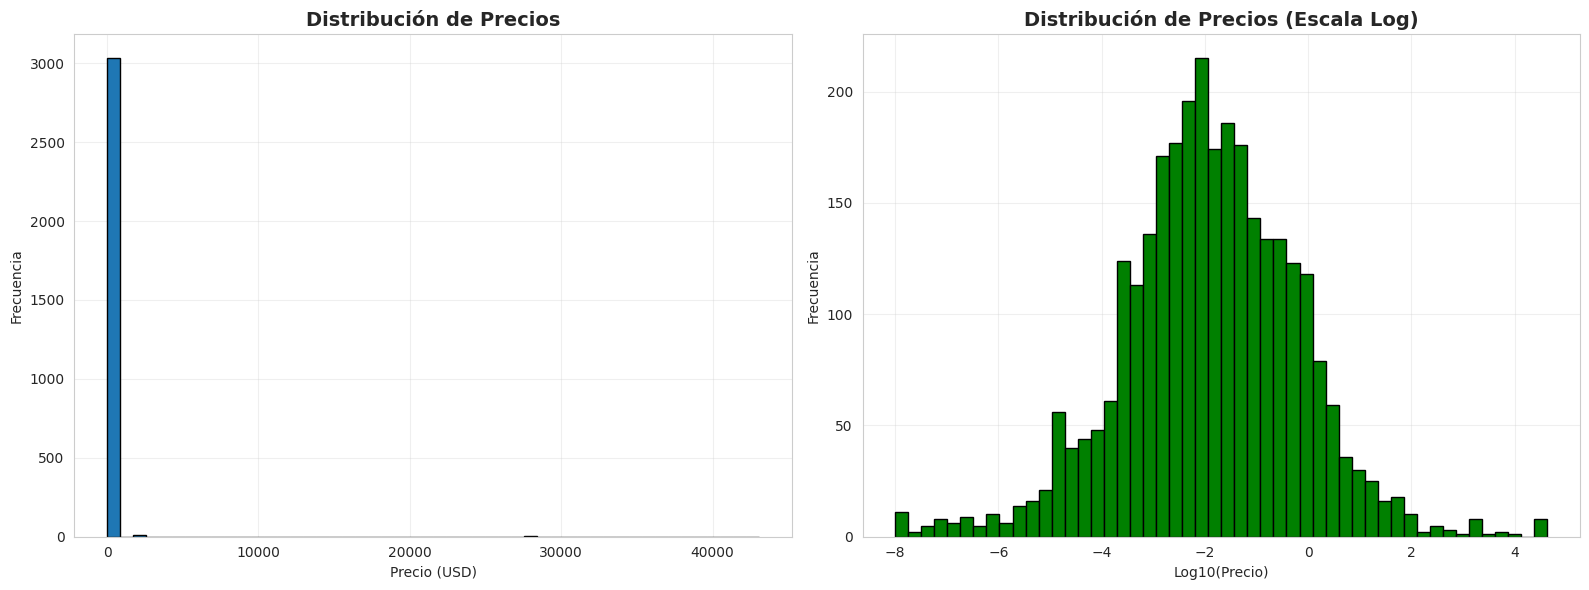

In [19]:
# Histograma de precios (escala logarítmica).
if "Price (Intraday)" in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Precio en escala normal.
    df_clean["Price (Intraday)"].hist(bins=50, ax=axes[0], edgecolor="black")
    axes[0].set_title("Distribución de Precios", fontsize=14, fontweight="bold")
    axes[0].set_xlabel("Precio (USD)")
    axes[0].set_ylabel("Frecuencia")
    axes[0].grid(True, alpha=0.3)
    
    # Precio en escala logarítmica.
    df_clean[df_clean["Price (Intraday)"] > 0]["Price (Intraday)"].apply(np.log10).hist(bins=50, ax=axes[1], edgecolor="black", color="green")
    axes[1].set_title("Distribución de Precios (Escala Log)", fontsize=14, fontweight="bold")
    axes[1].set_xlabel("Log10(Precio)")
    axes[1].set_ylabel("Frecuencia")
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 6.2 Top 20 Criptomonedas por Capitalización de Mercado

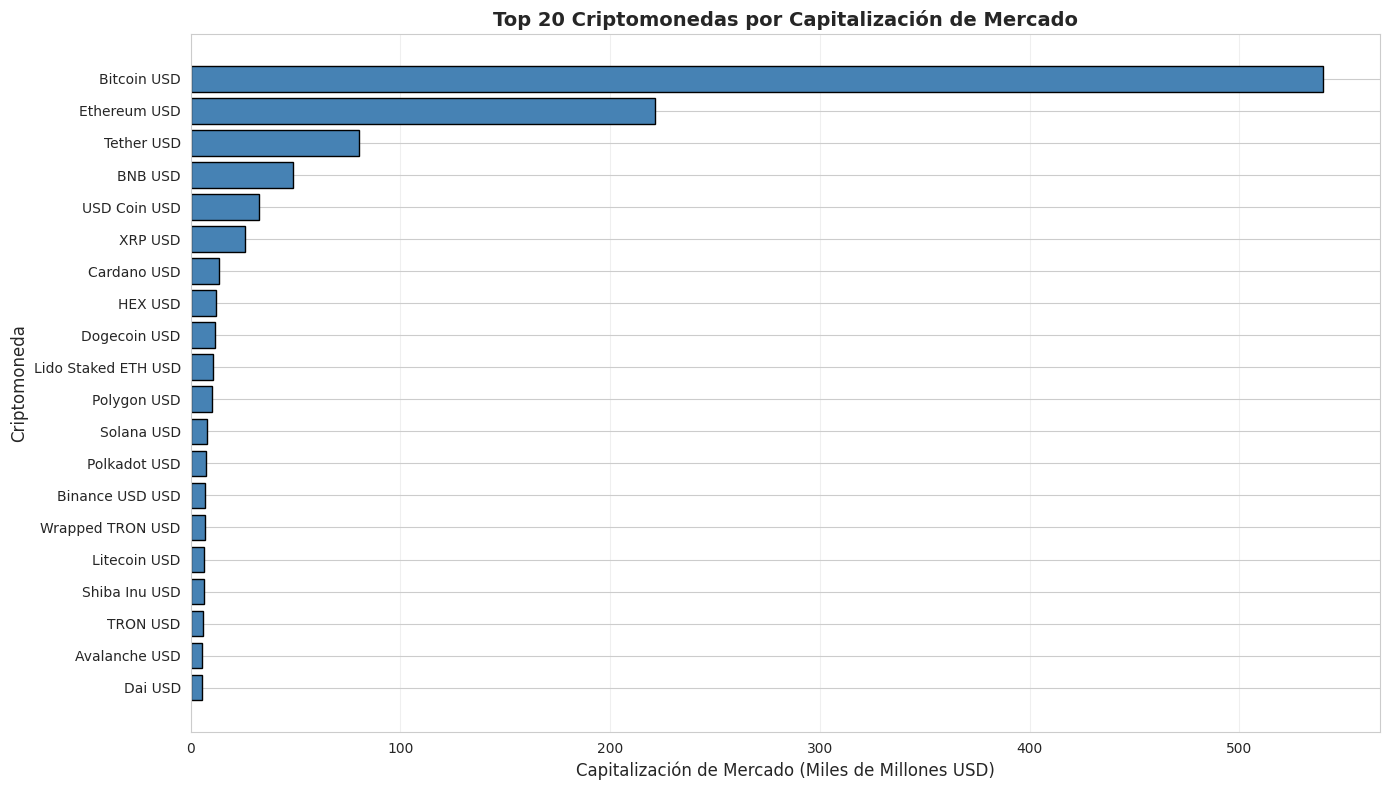

In [20]:
# Gráfico de barras de las top 20 criptomonedas.
if "Market Cap" in df_clean.columns and "Name" in df_clean.columns:
    plt.figure(figsize=(14, 8))
    top_20 = df_clean.nlargest(20, "Market Cap")
    
    plt.barh(top_20["Name"], top_20["Market Cap"] / 1e9, color="steelblue", edgecolor="black")
    plt.xlabel("Capitalización de Mercado (Miles de Millones USD)", fontsize=12)
    plt.ylabel("Criptomoneda", fontsize=12)
    plt.title("Top 20 Criptomonedas por Capitalización de Mercado", fontsize=14, fontweight="bold")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", alpha=0.3)
    plt.tight_layout()
    plt.show()

### 6.3 Distribución de Cambios Porcentuales

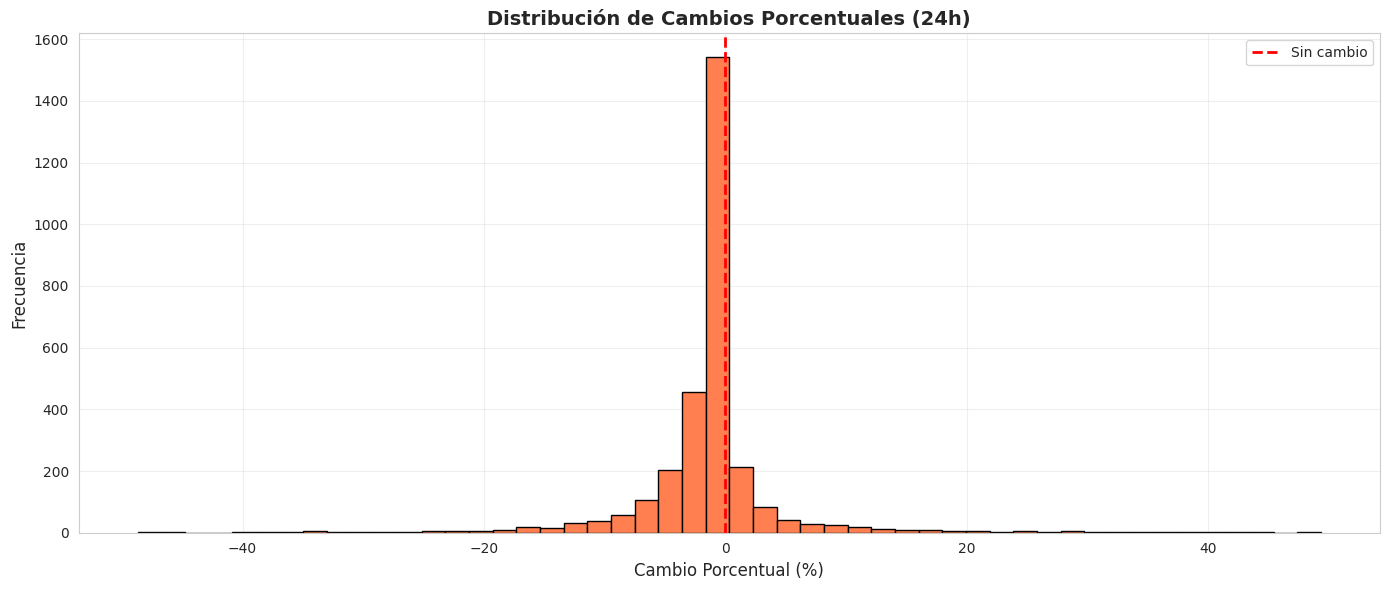

In [21]:
# Histograma de cambios porcentuales.
if "% Change" in df_clean.columns:
    plt.figure(figsize=(14, 6))
    
    # Filtrar valores extremos para mejor visualización.
    pct_change = df_clean["% Change"].dropna()
    pct_change_filtered = pct_change[(pct_change > -50) & (pct_change < 50)]
    
    plt.hist(pct_change_filtered, bins=50, edgecolor="black", color="coral")
    plt.axvline(0, color="red", linestyle="--", linewidth=2, label="Sin cambio")
    plt.xlabel("Cambio Porcentual (%)", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.title("Distribución de Cambios Porcentuales (24h)", fontsize=14, fontweight="bold")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### 6.4 Relación Precio vs Capitalización de Mercado

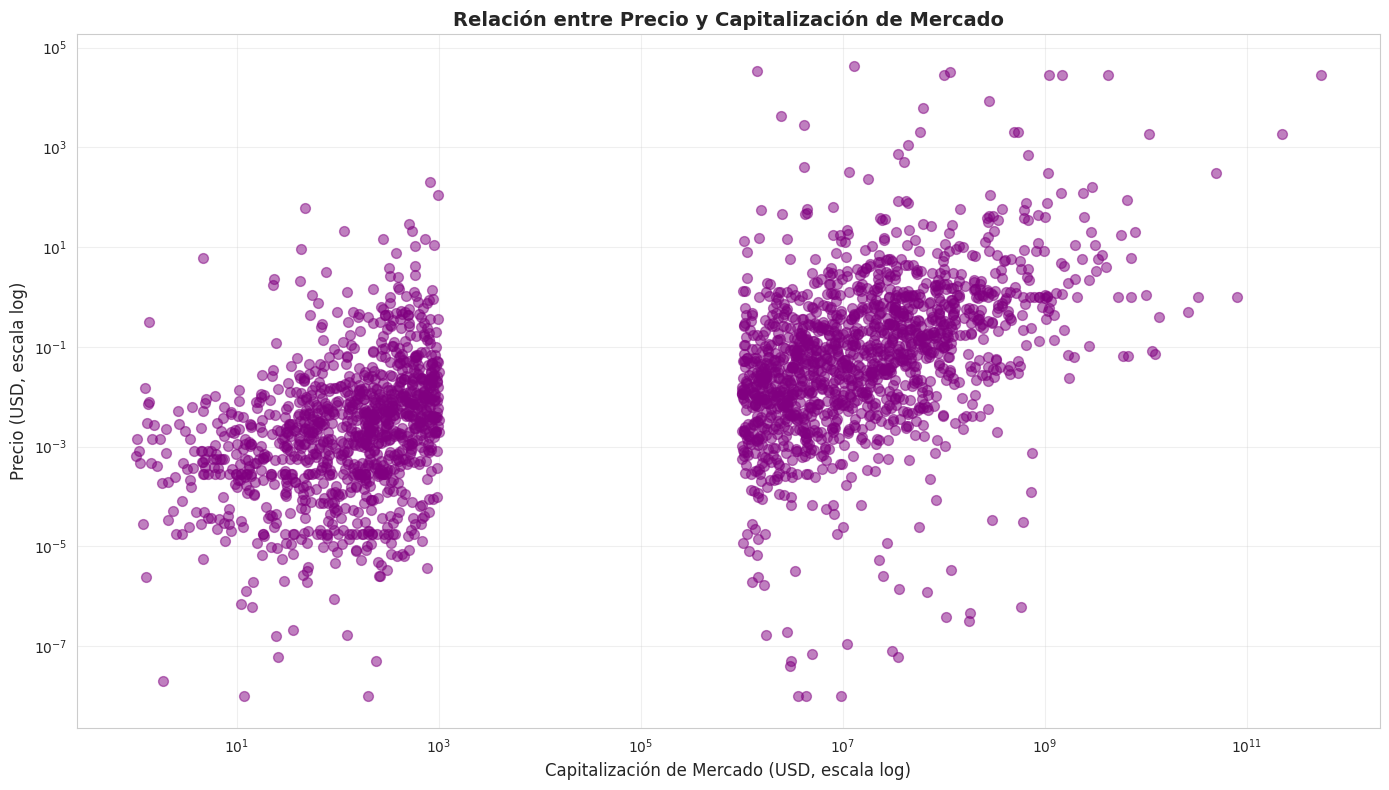

In [22]:
# Scatter plot de Precio vs Market Cap.
if "Price (Intraday)" in df_clean.columns and "Market Cap" in df_clean.columns:
    plt.figure(figsize=(14, 8))
    
    # Usar escala logarítmica para ambos ejes.
    scatter_data = df_clean[["Price (Intraday)", "Market Cap"]].dropna()
    scatter_data = scatter_data[(scatter_data["Price (Intraday)"] > 0) & (scatter_data["Market Cap"] > 0)]
    
    plt.scatter(scatter_data["Market Cap"], scatter_data["Price (Intraday)"], alpha=0.5, s=50, color="purple")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Capitalización de Mercado (USD, escala log)", fontsize=12)
    plt.ylabel("Precio (USD, escala log)", fontsize=12)
    plt.title("Relación entre Precio y Capitalización de Mercado", fontsize=14, fontweight="bold")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### 6.5 Box Plot de Cambios Porcentuales

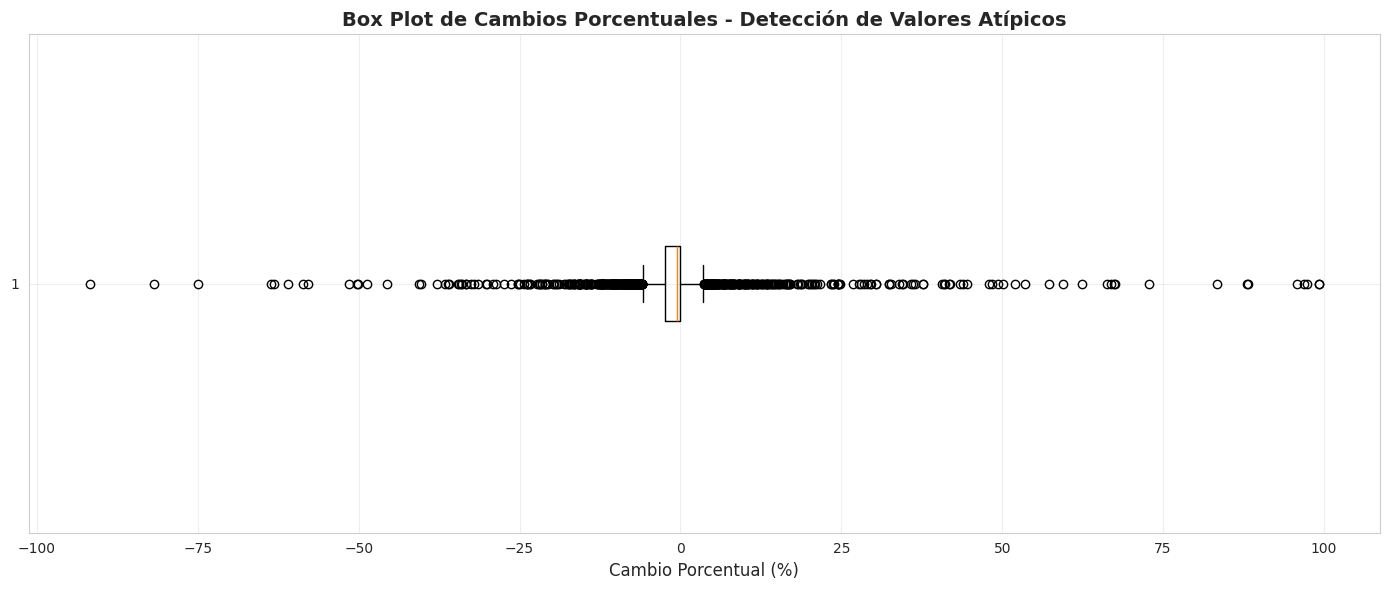

In [23]:
# Box plot para identificar valores atípicos en % Change.
if "% Change" in df_clean.columns:
    plt.figure(figsize=(14, 6))
    
    pct_change = df_clean["% Change"].dropna()
    pct_change_filtered = pct_change[(pct_change > -100) & (pct_change < 100)]
    
    plt.boxplot(pct_change_filtered, vert=False)
    plt.xlabel("Cambio Porcentual (%)", fontsize=12)
    plt.title("Box Plot de Cambios Porcentuales - Detección de Valores Atípicos", fontsize=14, fontweight="bold")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 7. Informe Resumen Final

In [24]:
print("="*80)
print("INFORME FINAL DE LIMPIEZA Y ANÁLISIS")
print("="*80)

print("\n1. RESUMEN DE LIMPIEZA DE DATOS:")
print(f"   - Filas originales: {len(df_dirty)}")
print(f"   - Filas limpias: {len(df_clean)}")
print(f"   - Filas eliminadas: {len(df_dirty) - len(df_clean)} ({((len(df_dirty) - len(df_clean))/len(df_dirty)*100):.2f}%)")
print(f"   - Duplicados eliminados: {removed_duplicates}")

print("\n2. CALIDAD DE DATOS:")
print(f"   - Total de valores faltantes: {df_clean.isnull().sum().sum()}")
print(f"   - Columnas con datos faltantes: {(df_clean.isnull().sum() > 0).sum()}")

print("\n3. HALLAZGOS CLAVE:")
if "Market Cap" in df_clean.columns and "Name" in df_clean.columns:
    top_crypto = df_clean.nlargest(1, "Market Cap")["Name"].values[0]
    top_mcap = df_clean.nlargest(1, "Market Cap")["Market Cap"].values[0]
    print(f"   - Criptomoneda líder: {top_crypto} (${top_mcap/1e9:.2f}B)")

if "% Change" in df_clean.columns:
    avg_change = df_clean["% Change"].mean()
    print(f"   - Cambio porcentual promedio: {avg_change:.2f}%")
    gainers_count = (df_clean["% Change"] > 0).sum()
    losers_count = (df_clean["% Change"] < 0).sum()
    print(f"   - Criptomonedas en alza: {gainers_count}")
    print(f"   - Criptomonedas en baja: {losers_count}")

if "Price (Intraday)" in df_clean.columns:
    avg_price = df_clean["Price (Intraday)"].mean()
    median_price = df_clean["Price (Intraday)"].median()
    print(f"   - Precio promedio: ${avg_price:.2f}")
    print(f"   - Precio mediano: ${median_price:.2f}")

print("\n4. DATASET LIMPIO:")
print(f"   - Guardado como: clean_dataset.csv")
print(f"   - Dimensiones: {df_clean.shape}")
print(f"   - Columnas: {df_clean.columns.tolist()}")

print("\n" + "="*80)
print("¡LIMPIEZA Y ANÁLISIS DE DATOS COMPLETADOS!")

INFORME FINAL DE LIMPIEZA Y ANÁLISIS

1. RESUMEN DE LIMPIEZA DE DATOS:
   - Filas originales: 3052
   - Filas limpias: 3052
   - Filas eliminadas: 0 (0.00%)
   - Duplicados eliminados: 0

2. CALIDAD DE DATOS:
   - Total de valores faltantes: 51
   - Columnas con datos faltantes: 2

3. HALLAZGOS CLAVE:
   - Criptomoneda líder: Bitcoin USD ($540.06B)
   - Cambio porcentual promedio: 0.11%
   - Criptomonedas en alza: 859
   - Criptomonedas en baja: 2079
   - Precio promedio: $96.45
   - Precio mediano: $0.01

4. DATASET LIMPIO:
   - Guardado como: clean_dataset.csv
   - Dimensiones: (3052, 10)
   - Columnas: ['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Market Cap', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)', 'Total Volume All Currencies (24Hr)', 'Circulating Supply']

¡LIMPIEZA Y ANÁLISIS DE DATOS COMPLETADOS!
